In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import sparse
from scipy.sparse.linalg import splu
import sympy
sympy.init_printing()
def display_matrix(m):
    display(sympy.Matrix(m))

In [2]:
np.random.seed(44)
nonzero_matrix = np.random.binomial(n=1,p=0.1,size=(5,5))
nonzero_matrix[2,1] = 3
sparsematrix = sparse.csr_matrix(nonzero_matrix)

In [3]:
display_matrix(sparsematrix.toarray())
sympy.pprint(sparsematrix)
sympy.pprint(sparsematrix.tocsc())

/Users/rohithkumaralaparthi/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_png function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/rohithkumaralaparthi/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_rgba function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/rohithkumaralaparthi/opt/anaconda3/lib/python3.9/site-packages/IPython/lib/latextools.py:126: MatplotlibDeprecationWarning: 
The to_mask function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use mathtext.math_to_image instead.
  mt.to_png(f, s, fontsize=12, dpi=dpi, color=color)
/Users/rohithkumaralaparthi/opt/anacon

⎡0  0  0  0  0⎤
⎢             ⎥
⎢0  0  0  0  0⎥
⎢             ⎥
⎢1  3  0  0  0⎥
⎢             ⎥
⎢1  1  0  0  0⎥
⎢             ⎥
⎣0  0  0  0  0⎦

  (2, 0)	1
  (2, 1)	3
  (3, 0)	1
  (3, 1)	1
  (2, 0)	1
  (3, 0)	1
  (2, 1)	3
  (3, 1)	1


In [4]:
dense_one = 2*np.ones(shape=(5,2),dtype=np.int32)
dense_two = np.reshape(np.array([i for i in range(1,11)]),(2,5))
display_matrix(sparsematrix@dense_one)
display_matrix(dense_two*sparsematrix)

⎡0  0⎤
⎢    ⎥
⎢0  0⎥
⎢    ⎥
⎢8  8⎥
⎢    ⎥
⎢4  4⎥
⎢    ⎥
⎣0  0⎦

⎡7   13  0  0  0⎤
⎢               ⎥
⎣17  33  0  0  0⎦

In [5]:
diagonal_matrix = sparse.diags([-2,1,5],[-1,0,1],shape=(5,5))
display_matrix(diagonal_matrix.toarray())
A = 3 * sparse.eye(5)
display_matrix(A.toarray())

⎡1.0   5.0    0     0     0 ⎤
⎢                           ⎥
⎢-2.0  1.0   5.0    0     0 ⎥
⎢                           ⎥
⎢ 0    -2.0  1.0   5.0    0 ⎥
⎢                           ⎥
⎢ 0     0    -2.0  1.0   5.0⎥
⎢                           ⎥
⎣ 0     0     0    -2.0  1.0⎦

⎡3.0   0    0    0    0 ⎤
⎢                       ⎥
⎢ 0   3.0   0    0    0 ⎥
⎢                       ⎥
⎢ 0    0   3.0   0    0 ⎥
⎢                       ⎥
⎢ 0    0    0   3.0   0 ⎥
⎢                       ⎥
⎣ 0    0    0    0   3.0⎦

In [6]:
x = np.array([[i] for i in range(1,6)])
b = A @ x
A_LU = splu(A.tocsc())
display_matrix(A_LU.solve(b))

⎡1.0⎤
⎢   ⎥
⎢2.0⎥
⎢   ⎥
⎢3.0⎥
⎢   ⎥
⎢4.0⎥
⎢   ⎥
⎣5.0⎦

In [7]:
r = 0.1
sigma = 0.2
x0 = np.log(100)
k = 100
Te= 1
Nspace = 3000
Ntime= 2000
x_max = np.log((3*float(k)))
x_min = np.log((float(k))/3)
x ,dx=np.linspace(x_min,x_max,Nspace,retstep = True)
T , dt = np.linspace(0,1,Ntime,retstep=True)

In [8]:
payoff = np.maximum(np.exp(x)-k,0)
V = np.zeros((Nspace,Ntime))
V[:,-1] = payoff
boundary_terms = np.zeros(Nspace-2)
V[-1,:] = np.exp(x_max) - k *np.exp(-r * T[::-1])
V[0,:]=0
sigma2 = sigma*sigma
dxx= dx*dx

In [9]:
a = (dt / 2) * ((r - 0.5 * sigma2) / dx - sigma2 / dxx)
b = 1 + dt * (sigma2 / dxx + r)
c = -(dt / 2) * ((r - 0.5 * sigma2) / dx + sigma2 / dxx)
D = sparse.diags([a, b, c], [-1, 0, 1], shape=(Nspace - 2, Nspace - 2)).tocsc()
D_LU = splu(D.tocsr())

/var/folders/ps/qy50qgzn5xj3302zsyyq124m0000gn/T/ipykernel_31942/3567135170.py:5: SparseEfficiencyWarning: splu converted its input to CSC format
  D_LU = splu(D.tocsr())


In [10]:
for i in range(Ntime - 2, -1, -1):
    boundary_terms[0] = a * V[0, i]
    boundary_terms[-1] = c * V[-1, i]
    
    V[1:-1, i] = D_LU.solve(V[1:-1, i + 1] - boundary_terms)

call_price = np.interp(x0, x, V[:, 0])
print(call_price)

13.269144076030782


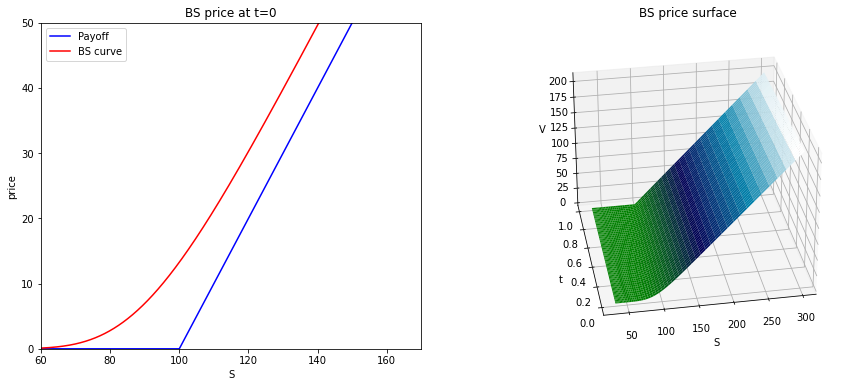

In [11]:
from matplotlib import cm
S = np.exp(x)
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection="3d")

ax1.plot(S, payoff, color="blue", label="Payoff")
ax1.plot(S, V[:, 0], color="red", label="BS curve")
ax1.set_xlim(60, 170)
ax1.set_ylim(0, 50)
ax1.set_xlabel("S")
ax1.set_ylabel("price")
ax1.legend(loc="upper left")
ax1.set_title("BS price at t=0")

X, Y = np.meshgrid(T, S)
ax2.plot_surface(Y, X, V, cmap=cm.ocean)
ax2.set_title("BS price surface")
ax2.set_xlabel("S")
ax2.set_ylabel("t")
ax2.set_zlabel("V")
ax2.view_init(30, -100)
plt.show()
